# Color-Magnitude Diagrams

Let's make some CMDs (and CCDs).

In this document, I'll step through a few different iterations of this basic plot.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

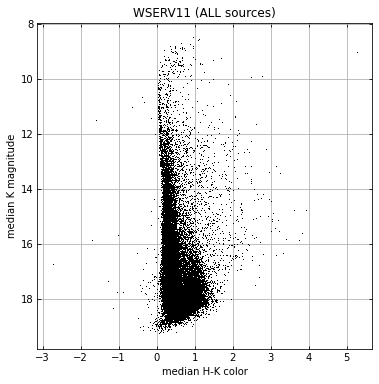

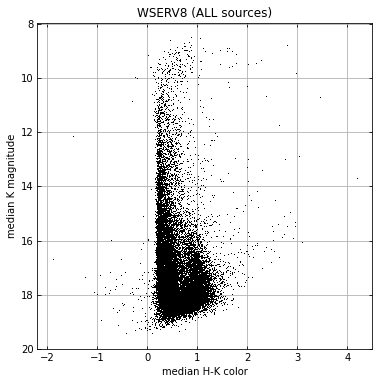

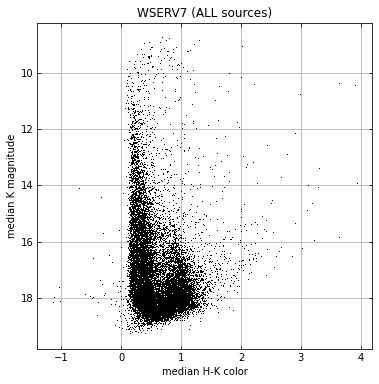

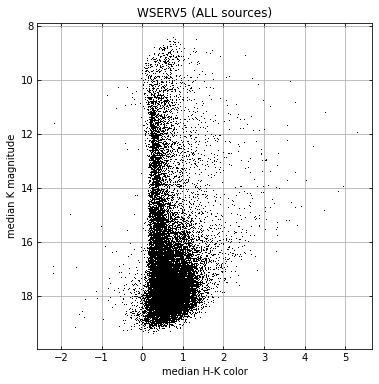

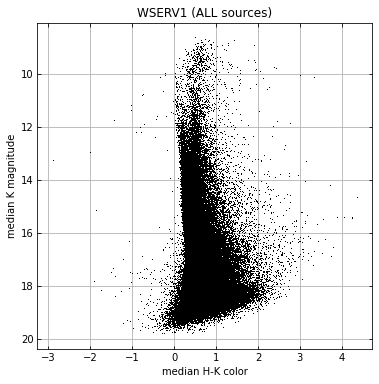

In [6]:
wserv_ids = [1, 5, 7, 8, 11]

output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

for wserv in wserv_ids[::-1]:

    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )

    ds = pd.read_hdf(output_path, key='table')
    
    fig, ax = plt.subplots(1, figsize=(6,6))
    
    # K, H-K
    ax.plot(ds['median']['HAPERMAG3'] - ds['median']['KAPERMAG3'], 
            ds['median']['KAPERMAG3'], 'k,')

    ax.tick_params(direction='in', top=True, right=True)
    ax.grid(True)
        
    ax.set_xlabel("median H-K color")
    ax.set_ylabel("median K magnitude")
    ax.set_title(f"WSERV{wserv} (ALL sources)")
    ax.invert_yaxis()

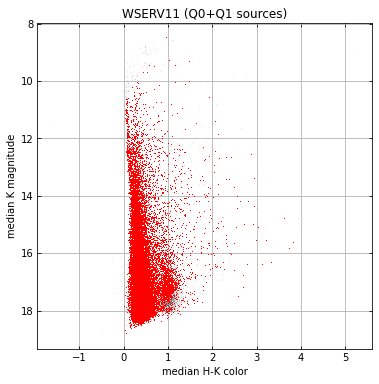

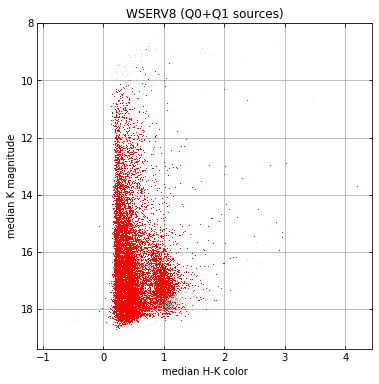

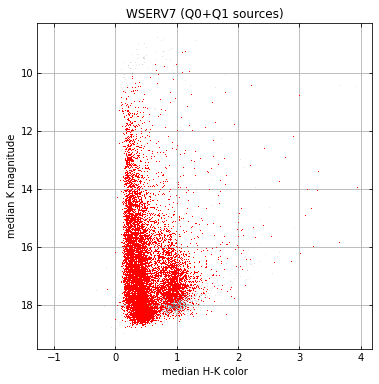

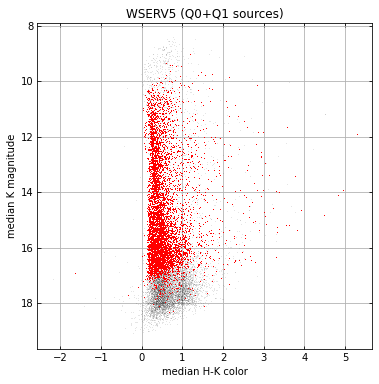

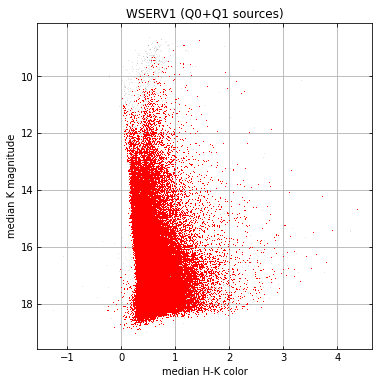

In [12]:
wserv_ids = [1, 5, 7, 8, 11]

output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

for wserv in wserv_ids[::-1]:

    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )

    ds = pd.read_hdf(output_path, key='table')
    
    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )
    q2 = (
        (ds["count"]["N_J"] >= 50)
        & (ds["count"]["N_J"] < 150)
        & (ds["count"]["N_H"] >= 50)
        & (ds["count"]["N_H"] < 150)
        & (ds["count"]["N_K"] >= 50)
        & (ds["count"]["N_K"] < 150)
        & (ds["mean"]["JAPERMAG3"] > 11)
        & (ds["mean"]["HAPERMAG3"] > 11)
        & (ds["mean"]["KAPERMAG3"] > 11)
        & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    q1 = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 150)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 150)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    
    fig, ax = plt.subplots(1, figsize=(6,6))
    
    # K, H-K
    ax.plot(ds['median']['HAPERMAG3'][q0] - ds['median']['KAPERMAG3'][q0], 
            ds['median']['KAPERMAG3'][q0], 'k,', alpha=0.1, )

    ax.plot(ds['median']['HAPERMAG3'][q1] - ds['median']['KAPERMAG3'][q1], 
            ds['median']['KAPERMAG3'][q1], 'r,')

    ax.tick_params(direction='in', top=True, right=True)
    ax.grid(True)
        
    ax.set_xlabel("median H-K color")
    ax.set_ylabel("median K magnitude")
    ax.set_title(f"WSERV{wserv} (Q0+Q1 sources)")
    ax.invert_yaxis()

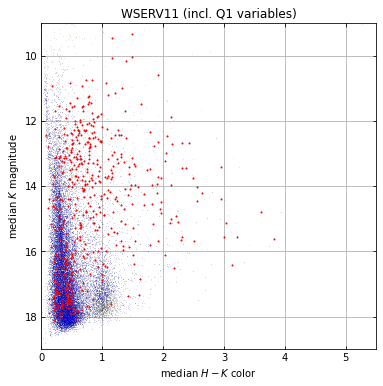

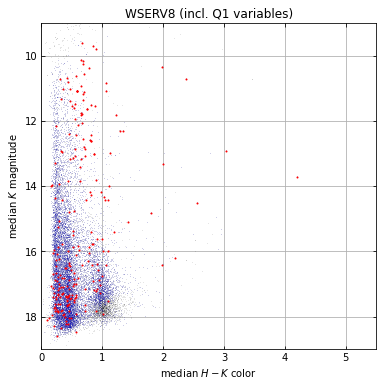

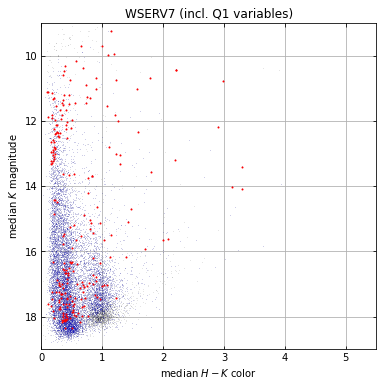

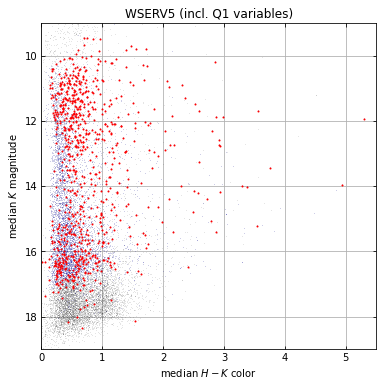

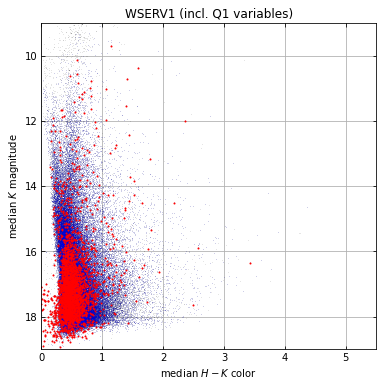

In [18]:

    
wserv_ids = [1, 5, 7, 8, 11]

output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

for wserv in wserv_ids[::-1]:

    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )

    ds = pd.read_hdf(output_path, key='table')
    
    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )
    q1v = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 150)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
            & (ds["variability"]["J_red_chisq"] > 2)
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 150)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
            & (ds["variability"]["H_red_chisq"] > 2)
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
            & (ds["variability"]["K_red_chisq"] > 2)
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )
    q1 = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 150)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 150)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    
    fig, ax = plt.subplots(1, figsize=(6,6))
    
    # K, H-K
    ax.plot(ds['median']['HAPERMAG3'][q0] - ds['median']['KAPERMAG3'][q0], 
            ds['median']['KAPERMAG3'][q0], 'k,', alpha=0.1, )

    ax.plot(ds['median']['HAPERMAG3'][q1] - ds['median']['KAPERMAG3'][q1], 
            ds['median']['KAPERMAG3'][q1], 'b,', alpha=0.1)

    ax.plot(ds['median']['HAPERMAG3'][q1v] - ds['median']['KAPERMAG3'][q1v], 
            ds['median']['KAPERMAG3'][q1v], 'r.', ms=2, alpha=1)

    
    ax.tick_params(direction='in', top=True, right=True)
    ax.grid(True)
        
    ax.set_xlabel("median $H-K$ color")
    ax.set_ylabel("median $K$ magnitude")
    ax.set_title(f"WSERV{wserv} (incl. Q1 variables)")
    ax.set_xlim(0, 5.5)
    ax.set_ylim(19, 9)

In [19]:
# Everything in this cell is stolen verbatim from:
# /Users/tsrice/Desktop/Academia/Variability_Data_2019/WSERV8 Brown Dwarf CMD selection.ipynb

# What are brown dwarf JHK mags here?
# Johanna writes: (in email from 21 July, 11:32AM)
# Apparent 2MASS mags:
# 14.687525162024361 14.12252516202436 13.84952516202436
J_BDlimit = 14.687525162024361
H_BDlimit = 14.12252516202436
K_BDlimit = 13.84952516202436
HmK_BDlimit = H_BDlimit-K_BDlimit

# What does A_V=1 correspond to? (see Rieke & Lebofsky 1985)
A_K = 0.112
A_H = 0.175
E_HK = A_H - A_K
print(A_K, E_HK)

print(K_BDlimit, HmK_BDlimit)

# solving for y=mx+b
slope = A_K/E_HK
y_intercept = K_BDlimit - slope*HmK_BDlimit
print(slope, y_intercept)

0.112 0.06299999999999999
13.84952516202436 0.2729999999999997
1.7777777777777781 13.364191828691027


In [35]:
# actually we're going to do this systematically.

from wuvars.analysis.bd_mags import apparent_BD_mags_jhk

apparent_BD_mags_jhk

{1: (17.38084993495972, 16.81544993495972, 16.537049934959718),
 5: (14.148001705604496, 13.585001705604496, 13.319001705604496),
 7: (13.348838101770548, 12.787838101770548, 12.520338101770548),
 8: (14.687525162024361, 14.12252516202436, 13.84952516202436),
 11: (16.706257294442732, 16.140257294442733, 15.868257294442731)}

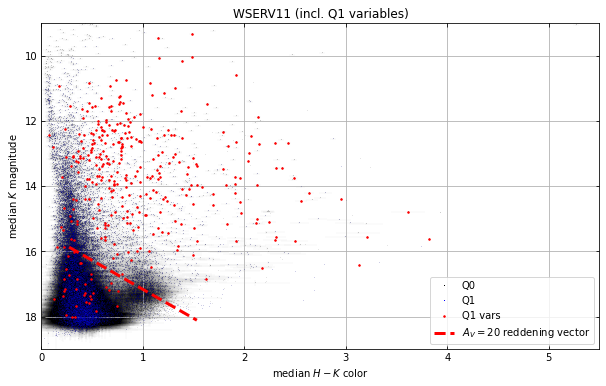

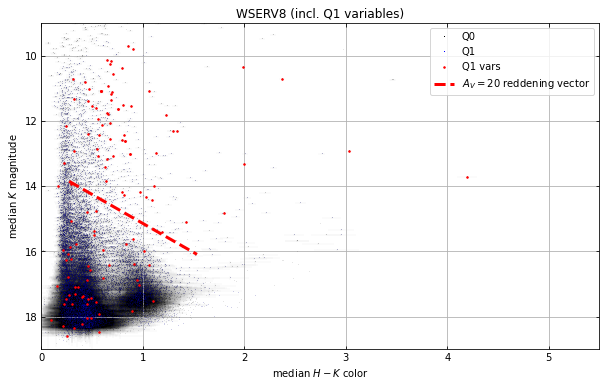

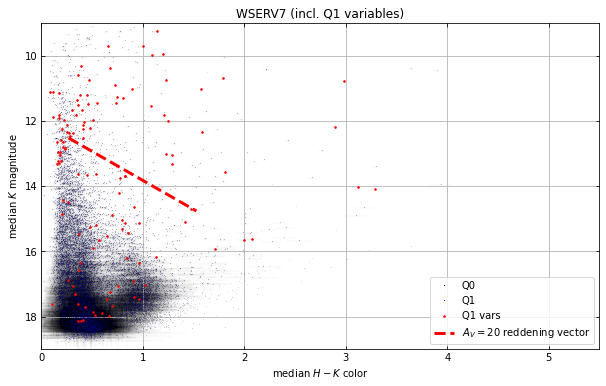

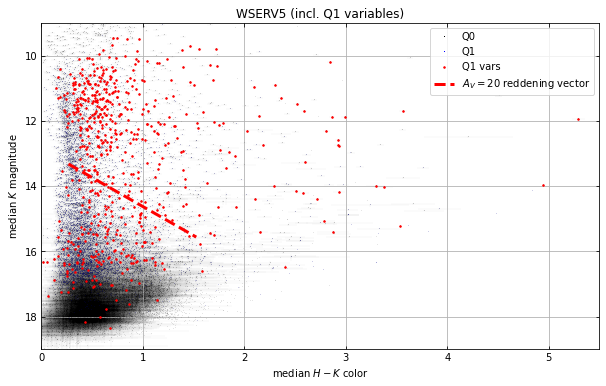

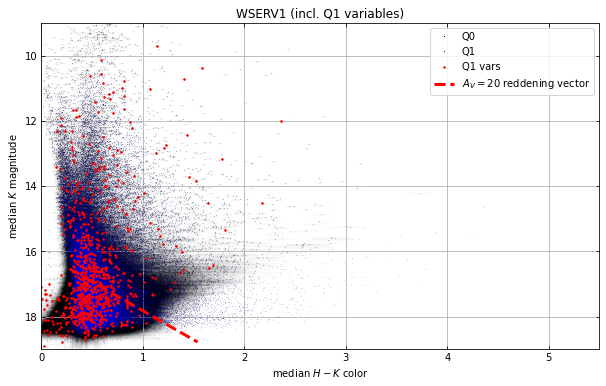

In [42]:
wserv_ids = [1, 5, 7, 8, 11]

output_root = "/Users/tsrice/Documents/Variability_Project_2020/wuvars/Data/analysis_artifacts"

for wserv in wserv_ids[::-1]:

    output_path = os.path.join(
        output_root,
        f"wserv{str(wserv)}",
        f"WSERV{str(wserv)}_graded_clipped0.95_scrubbed0.1_dusted0.5_summary_spreadsheet.h5",
    )

    ds = pd.read_hdf(output_path, key='table')
    
    q0 = (
        (ds["count"]["N_J"] >= 50)
        | (ds["count"]["N_H"] >= 50)
        | (ds["count"]["N_K"] >= 50)
    )
    q1v = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 150)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
            & (ds["variability"]["J_red_chisq"] > 3)
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 150)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
            & (ds["variability"]["H_red_chisq"] > 3)
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
            & (ds["variability"]["K_red_chisq"] > 3)
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )
    q1 = (
        (
            (ds["count"]["N_J"] >= 50)
            & (ds["count"]["N_J"] < 150)
            & (ds["mean"]["JAPERMAG3"] > 11)
            & (ds["count"]["N_J"] == ds["count"]["N_J_good"])
        )
        | (
            (ds["count"]["N_H"] >= 50)
            & (ds["count"]["N_H"] < 150)
            & (ds["mean"]["HAPERMAG3"] > 11)
            & (ds["count"]["N_H"] == ds["count"]["N_H_good"])
        )
        | (
            (ds["count"]["N_K"] >= 50)
            & (ds["count"]["N_K"] < 150)
            & (ds["mean"]["KAPERMAG3"] > 11)
            & (ds["count"]["N_K"] == ds["count"]["N_K_good"])
        )
        & (ds["median"]["PSTAR"] > 0.75)
    )    
    
    fig, ax = plt.subplots(1, figsize=(10,6))
    
    h = ds['median']['HAPERMAG3']
    k = ds['median']['KAPERMAG3']
    hmk = h-k
    
    h_e = ds['median']['HAPERMAG3ERR']
    k_e = ds['median']['KAPERMAG3ERR']
    hmk_e = (h_e**2 + k_e**2)**0.5
    
    ee = (hmk_e<1) & (k_e<1)
    
    # K, H-K
    ax.plot(hmk[q0], k[q0], 'k,', alpha=0.1, label='Q0')
    ax.errorbar(hmk[q0 & ee], k[q0 & ee], xerr=hmk_e[q0 & ee], yerr=k_e[q0 & ee], fmt='k,', alpha=0.1, elinewidth=0.3, zorder=-1)

    ax.plot(hmk[q1], k[q1], 'b,', alpha=0.1, label='Q1')

    ax.plot(hmk[q1v], k[q1v], 'r.', ms=3, alpha=1, label="Q1 vars")


    J_BDlimit = apparent_BD_mags_jhk[wserv][0]
    H_BDlimit = apparent_BD_mags_jhk[wserv][1]
    K_BDlimit = apparent_BD_mags_jhk[wserv][2]
    
    # REDDENING VECTOR OF A_V = 10
    # the x values go from H-K brown dwarf limit to that value minus (plus?) 10 A_V's
    # the y values go from the K brown dwarf limit to that value minus (plus?) 10 A_V's
    ax.plot(
        [H_BDlimit-K_BDlimit, (H_BDlimit-K_BDlimit) + E_HK*20],
        [K_BDlimit, K_BDlimit + A_K*20],
        'r--', lw=3,
        label='$A_V=20$ reddening vector'
    )
    leg = ax.legend()
    for lh in leg.legendHandles: 
        lh._legmarker.set_alpha(1)

        ax.tick_params(direction='in', top=True, right=True)
    ax.grid(True)
        
    ax.set_xlabel("median $H-K$ color")
    ax.set_ylabel("median $K$ magnitude")
    ax.set_title(f"WSERV{wserv} (incl. Q1 variables)")
    ax.set_xlim(0, 5.5)
    ax.set_ylim(19, 9)

## Takeaways

All the red dots below (and to the left) of the dashed reddening vectors in the plots above are candidate variable brown dwarfs. There's tons of them.

I want to re-run this analysis after we've re-applied a better "error correction". The variability criterion (and the q2/q1/q0 criteria) are NOT finalized. So the above is a preview, but... importantly, it's WAY more than the 4 variables we were seeing back in July. And that's amazing.